convention
inp==input 
out==ouput
unwanted code block jst for my refernce so the code will be in commented form #

# the main thing is to run this whole program in  python 3.9 
# as the many reason is torch supporst this version 

# setting up the mario game in python

In [1]:
#import te frame work/lib super_mario_bros
import gym_super_mario_bros
#import the joypadspace here we have the controls 
from nes_py.wrappers import JoypadSpace
#SIMPLE_MOVEMENT contains simple controlls like 7 of them so we will import them
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# SIMPLE_MOVEMENT  #u can see over here how many controlls we have

In [3]:
env=gym_super_mario_bros.make("SuperMarioBros-v0")  #here we are creating a SuperMarioBros-v0 env and binding it to env variable
env=JoypadSpace(env,SIMPLE_MOVEMENT)  #and we are binding the keys to environment so that we can use the controls present in joypadspace

In [4]:
# type(env)  #checking how what type is the variable env
#in this case env is nes_py.wrappers.joypad_space.JoypadSpace

In [5]:
# env.action_space  #env.actionp_space it consist of all the 7 actions 
# env.action_space.sample() #this will provide us random move so we use this for random movement of the character

In [6]:
# env.observation_space.shape  #this is were the info of  change frame is recived like if a character moves thats a different frame ryt so that frame is store as an np array/in the form of matrix

#we will use this info to process it later

#in simple terms as the frame changes the changed frame is collect over here in the form of matrix

#out=>(240, 256, 3) means we are getting the out of 240x256 pixel with 3 layers(means rgb)

In [7]:
# env.action_space  #out: Discrete(7) means have 7 moves 
#and those are the moves present in SIMPLE_MOVEMENT

In [8]:
# SIMPLE_MOVEMENT

In [9]:
# SIMPLE_MOVEMENT[env.action_space.sample()]

In [10]:
#here we are using the flage varible this tells to restart the game or not 
done=True

#here we are looping through the whole frame
#like if their is any change in the frame we click a button
for steps in range(100000):
    #start the game to begin with 
    if done:
        #start the game
        env.reset()
        
    state,reward,done,info=env.step(env.action_space.sample()) #env.step() allows us to take the step in our game like move left up etc #env.action_space.sample() allows us to take random actions
    env.render() #allows us to show the game on the screeen
    
env.close()

KeyboardInterrupt: 

In [11]:
env.close() #to close the program

In [12]:
# state=env.reset()  #the values that we get back from env.reset is called state

In [13]:
# state  #state  is the frame that we get back from the game
# state.shape  #out->(240, 256, 3) so you can see this is a size of a frame

In [14]:
# len(env.step(1))  #when we run the env.step we get for things back those are state,reward,done , info

In [15]:
# s=env.step(1) #here i have stored it to a variable called s


In [16]:
# s[0] #1st:- state if we jump what we are gonna get is the frame when mario jumps
# s[1] #2nd - reward this like telling if we have got a point or not for the action done
# s[2] #3rd - somthing boolen
# s[3] #4rd - we get some info like the number of coins and etc 


# preprocessing the environment

In [17]:
#install pytorch 
# using this command to install torch
# pip3 install torch torchvision torchaudio

here we will encounter an error if out pip is not in the version 21.3.1
use this
*c:\python\python39\python.exe -m pip install pip==21.3.1*


In [18]:
# and we have to install stable baseline3
# using the command 
# stable baseline3[extra]

In [19]:
#import frane stacker wrapper and grayscaling wrapper  for stacking the gray scaled image on top of one another and grayscaling wrapper for converting the colored frame to grayscale
from gym.wrappers import GrayScaleObservation

#import vectorization wrappers
from stable_baselines3.common.vec_env import VecFrameStack,DummyVecEnv  #vecframestack allows us to work with framestack and dummyvecenv helps us wrap the  base env inside vectorization wrapper

#import matplotlib  used for showing the impact of frame stacking 

import matplotlib.pyplot as plt

c:\python\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
#now we wrapp our model

In [20]:
#create the base  environment
env=gym_super_mario_bros.make("SuperMarioBros-v0") 
#simplfy our controls
env=JoypadSpace(env,SIMPLE_MOVEMENT)

#grayscale
env=GrayScaleObservation(env,keep_dim=True) #here keep_dim=True is important for frame stacking

#wrap it inside dummy env
env=DummyVecEnv([lambda :env])

#stack the frames
env=VecFrameStack(env,4,channels_order='last')  #here the nummber 4 denotes the number of frame we wanna stack on each other

In [21]:
state=env.reset()

In [22]:
state.shape  #here  (240, 256, 1) previously we had 3 channel(rgb) now after wrapping it up with the grayscaleobservation  the channel number has become 1 which means it is downscaled to grayscaled image

#after wrapping the env in dummy env we get  (1, 240, 256, 4) the last number is changed from 1 to 4

#means we have 4 different grayscaled images stacked togther

(1, 240, 256, 4)

In [23]:
# 240*256*1==61440

# here we have 61440 pixels to process when grayscaled

# 240*256*3==184320 

#when we dont grayscale we have 184320 to process



In [24]:
state,reward,done,info=env.step([env.action_space.sample()])   #taking random steps like jump,left etc...
# print(state[0])

In [25]:
#here we are running the env.step() 20 times so we can visulaize the change in the frame


for i in range(20):
    state,reward,done,info=env.step([5])

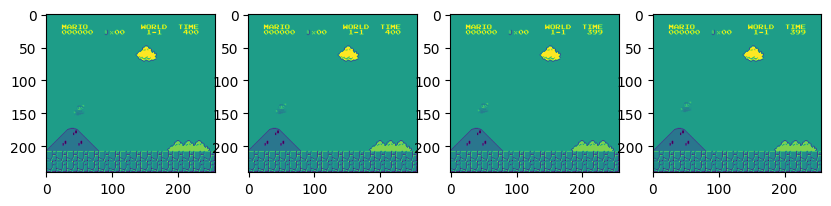

In [26]:
#visulalizing a lit bit better
plt.figure(figsize=(10,8))
for idx in range(state.shape[3]):  #here the state.shape[3]==4 means we have stacked 4 images on top of each one so we need to visulaize that part
    plt.subplot(1,4,idx+1)  #1,4 means the frame 1 to 4 to be loaded and shown at a time
    plt.imshow(state[0][:,:,idx])

plt.show()
    

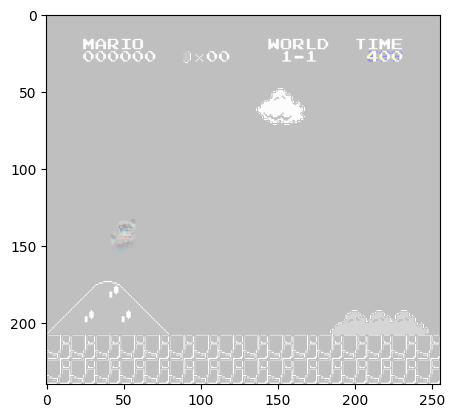

In [27]:

#using matplot lib to show the frame
plt.imshow(state[0])
#here we are seeing the grayscaled image

# trainig the game using reinforcement learning


agent:mario<br>reward:points<br>environment:game<br>action:steps

here we are gonna the reinforcement learning algo is ppo:proximal policy optimization

In [29]:
#import os 
import os 
#import ppo
from stable_baselines3 import PPO  #this the algorithm
#import base callback for saving madels
from stable_baselines3.common.callbacks import BaseCallback  #this is used for saving the model

### this below code is optional but it is used for saving the model every few steps later

In [20]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):   #check_freq is for how frequent we are gonna save the model, save_path were we are gonna save the model
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [21]:
#set up some directory where we are gonna save our model
CHECKPOINT_DIR="./train/"  #and eveytime we train we get a new checkpoint 
LOG_DIR="./logs/"   #eveytime we run the algo we create a new log 

In [22]:
#setup model saving callback
callback=TrainAndLoggingCallback(check_freq=10,save_path=CHECKPOINT_DIR)  #for every 10000 steps we are gonna save the model

In [23]:
#here the model we are gonna use is ppo
model=PPO("CnnPolicy",env,verbose=1,tensorboard_log=LOG_DIR,learning_rate=0.000001,
         n_steps=512)

#the above line has created a tempory model

Using cpu device
Wrapping the env in a VecTransposeImage.


#create the base  environment<br>
env=gym_super_mario_bros.make("SuperMarioBros-v0") <br>
#simplfy our controls<br>
env=JoypadSpace(env,SIMPLE_MOVEMENT)<br>

#grayscale<br>
env=GrayScaleObservation(env,keep_dim=True) #here keep_dim=True is important for frame stacking<br>

#wrap it inside dummy env<br>
env=DummyVecEnv([lambda :env])<br>

#stack the frames<br>
env=VecFrameStack(env,4,channels_order='last')<br>

this is gonna be our preprocessed data that we are gonna feed to our model

### this is for what is total_timesteps
Suppose we set total_timesteps to 1,000,000 for this training process. This means that the agent will interact with the environment and take actions for 1,000,000 timesteps or until the end of the game, whichever comes first. During each timestep, the agent will observe the game screen, take an action (move the paddle up or down), and receive a reward (positive or negative depending on whether it hits the ball or misses).

In [25]:
#here we train the model ,this is where the model learns 
model.learn(total_timesteps=50,callback=callback)

Logging to ./logs/PPO_1
----------------------------
| time/              |     |
|    fps             | 1   |
|    iterations      | 1   |
|    time_elapsed    | 337 |
|    total_timesteps | 512 |
----------------------------


In [26]:
#if we want to save the existing model we can do the below
model.save("thisislatestmodel")

# now load the lastest ppo model that is trained

In [33]:
model=PPO.load("./latestmodel.zip")

AttributeError: Can't get attribute 'RandomNumberGenerator._generator_ctor' on <module 'gym.utils.seeding' from 'c:\\python\\python39\\lib\\site-packages\\gym\\utils\\seeding.py'>

In [30]:
# state=env.reset()  #start the env by reseting everything

In [40]:
# SIMPLE_MOVEMENT[model.predict(state)[0][0]]  #Now for that state we are passing it to the model which is trained  this is will return a number which will correspond to the move that has to be taken in SIMPLE_MOVEMENT"

['right']

In [45]:
# model.predict(state)[1]

In [28]:
#start the game
state=env.reset()
#loop thorugh the game
while True:
    action,_=model.predict(state)  #the model will predict and return a number corresponding to the move to be taken in SIMPLE_MOVEMENT
    #and it will return another value and i dnt know wt it is and it is not important 
    state,reward,done,info=env.step(action)  #the action to be taken is sent to the env.step which will change the frame by taking that predicted step
    env.render()

KeyboardInterrupt: 

In [29]:
env.close()